   
### Import libraries

In [73]:
import pandas as pd
import re
import datetime as dt

### Data Preperation

In [74]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [75]:
df = pd.read_csv("Quality of Hire Survey -180 Days Cleaning.csv", header=0, skiprows=[1,2])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   startDate            65 non-null     object 
 1   endDate              65 non-null     object 
 2   status               65 non-null     object 
 3   ipAddress            65 non-null     object 
 4   progress             65 non-null     int64  
 5   duration             65 non-null     int64  
 6   finished             65 non-null     bool   
 7   recordedDate         65 non-null     object 
 8   _recordId            65 non-null     object 
 9   external_reference   65 non-null     int64  
 10  recipientLastName    65 non-null     object 
 11  recipientFirstName   65 non-null     object 
 12  recipientEmail       65 non-null     object 
 13  locationLatitude     65 non-null     float64
 14  locationLongitude    65 non-null     float64
 15  distributionChannel  65 non-null     objec

In [76]:
snake_case = re.compile(r'(?<!^)(?=[A-Z])')
new_columns = [snake_case.sub('_', item).lower() for item in list(df.columns)]

In [77]:
vars_to_change = [("i_p_address", "ip_address"),("duration (in seconds)", "duration_seconds"), ("recipient_last_name", "employee_last_name" ), ("recipient_first_name", "employee_first_name"), ("recipient_email", "manager_email"), ("external_reference", "employee_id"), ("rater_name_1", "rater_firstname"), ("rater_name_2", "rater_lastname"), ("rater_name_3", "rater_email_entered"), ("manager_email", "manager_email_auto"), ("employee_email", "employee_email_auto"), ("manager_i_d", "manager_id_auto"), ("external_data_reference", "employee_id_auto"), ("demonstrates__l_ps", "demonstrates_lps")]


In [78]:
def changeNames(new_columns, vars_to_change):
    for idx, name in enumerate(new_columns):
      newVar = [item[1] for item in vars_to_change if item[0] == name]
      if(newVar):
          print("New Var is", newVar)
          new_columns[idx] = newVar[0]
    return new_columns

In [79]:
df.columns = changeNames(new_columns, vars_to_change)
df.columns

New Var is ['employee_id']
New Var is ['employee_last_name']
New Var is ['employee_first_name']
New Var is ['manager_email']
New Var is ['manager_email_auto']
New Var is ['employee_email_auto']
New Var is ['manager_id_auto']


Index(['start_date', 'end_date', 'status', 'ip_address', 'progress',
       'duration', 'finished', 'recorded_date', '_record_id', 'employee_id',
       'employee_last_name', 'employee_first_name', 'manager_email',
       'location_latitude', 'location_longitude', 'distribution_channel',
       'user_language', 'q_i_d20_1', 'q_i_d20_2', 'q_i_d20_3', 'q_i_d5',
       'q_i_d3', 'q_i_d6', 'q_i_d33_1', 'q_i_d33_2', 'q_i_d33_3', 'q_i_d35_1',
       'q_i_d35_2', 'q_i_d35_3', 'q_i_d36_1', 'q_i_d36_2', 'q_i_d37_1',
       'q_i_d37_2', 'q_i_d37_8', 'manager_email_auto', 'employee_email_auto',
       'manager_id_auto'],
      dtype='object')

In [80]:
print("Converting start_date and end_date to datetime")
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

Converting start_date and end_date to datetime


In [81]:
pd.DataFrame(df.columns).to_clipboard()

In [82]:
df.columns = ['start_date', 'end_date', 'status', 'ip_address', 'progress',
       'duration', 'finished', 'recorded_date',
       'record_id', 'employee_id', 'employee_last_name',
       'employee_first_name','manager_email','location_latitude', 'location_longitude',
       'distribution_channel', 'user_language', 'rater_name_1', 'rater_name_2', 'rater_name_3', 'is_manager', 'employee_category', 'howlong_managed', 'has_background', 'has_skills', 'produced_quality', 'works_well_oth', 'is_motivated', 'demonstrates_LPs', 'correct_job_level', 'will_succeed', 'hire_again', 'raises_bar', 'top_performer',
       'manager_email', 'employee_email', 'manager_id',
       ]

In [83]:
df = df[df['status'] != "Survey Preview"]
df = df[df['finished'] != False]
df[df['status'] == "Survey Preview"]
df[df['finished'] == False]

,start_date,end_date,status,ip_address,progress,duration,finished,recorded_date,record_id,employee_id,employee_last_name,employee_first_name,manager_email,location_latitude,location_longitude,distribution_channel,user_language,rater_name_1,rater_name_2,rater_name_3,is_manager,employee_category,howlong_managed,has_background,has_skills,produced_quality,works_well_oth,is_motivated,demonstrates_LPs,correct_job_level,will_succeed,hire_again,raises_bar,top_performer,manager_email,employee_email,manager_id


In [84]:
pd.DataFrame(df.columns)

,0
0,start_date
1,end_date
2,status
3,ip_address
4,progress
5,duration
6,finished
7,recorded_date
8,record_id
9,employee_id


In [85]:
df[(df['is_manager'] == "No, I am not this person's manager") | (df['howlong_managed'] == "One month or less")]
df = df[~(df['is_manager'] == "No, I am not this person's manager")]
df = df[~(df['howlong_managed'] == "One month or less")]


In [126]:
def my_recode(item):
    if item == "Strongly Agree":
        return 5
    elif item == "Agree":
        return 4
    elif item == "Neither Agree Nor Disagree":
        return 3
    elif item == "Disagree":
        return 2
    elif item == "Strongly Disagree":
        return 1
    else:
        return None

In [133]:
print("Creating numerical variables ... ")
df['has_background_num'] = df.has_background.apply(my_recode)
df['has_skills_num'] = df.has_skills.apply(my_recode)
df['produced_quality_num'] = df.produced_quality.apply(my_recode)
df['works_well_oth_num'] = df.works_well_oth.apply(my_recode)
df['is_motivated_num'] = df.is_motivated.apply(my_recode)
df['demonstrates_lps_num'] = df.demonstrates_LPs.apply(my_recode)
df['correct_job_level_num'] = df.correct_job_level.apply(my_recode)
df['will_succeed_num'] = df.will_succeed.apply(my_recode)
df['hire_again_num'] = df.hire_again.apply(my_recode)
df['raises_bar_num'] = df.raises_bar.apply(my_recode)
df['top_performer_num'] = df.top_performer.apply(my_recode)


Creating numerical variables ... 


In [88]:
print("Here are the final columns")
pd.DataFrame(df.columns).to_clipboard()

Here are the final columns


In [89]:
new_var = df['employee_id'] = df["employee_id"].astype('int')

In [90]:
df.loc[5:16, ['employee_id']]

,employee_id
5,116667
6,116710
7,116164
8,116874
9,116762
10,115856
11,116861
12,116546
13,114331
14,116449


In [91]:
db_query_ids = []
for item in df['employee_id']:
    db_query_ids.append(f"'{item}'")     
final_query = "(" + ",".join(db_query_ids) + ")"
pd.DataFrame([final_query]).to_clipboard(index=False, header=False)

In [92]:
df_dem = pd.read_csv('qoh_demographics.csv', header=0)
pd.DataFrame(df_dem.columns)

,0
0,worker_dim_seq_id
1,worker_dim_version
2,rec_effective_start_date
3,rec_effective_end_date
4,is_current_record
5,deleted_record_indicator
6,worker_id
7,is_active_worker
8,legacy_adp_associate_id
9,legacy_adp_position_id


In [93]:
df_merged = df.merge(df_dem, how="left", left_on='employee_id', right_on='worker_id')
df = df_merged.copy()

In [94]:
df['original_hire_date'] = pd.to_datetime(df['original_hire_date'])
df['last_hire_date'] = pd.to_datetime(df['last_hire_date'])

In [95]:
df['raw_qoh_score'] = df.loc[:, ['has_background_num', 'has_skills_num', 'produced_quality_num', 'works_well_oth_num', 'is_motivated_num', 'demonstrates_lps_num', 'correct_job_level_num', 'will_succeed_num', 'hire_again_num', 'raises_bar_num', 'top_performer_num' ]].sum(axis=1)


In [96]:
df['qoh_score'] = df['raw_qoh_score'].apply(lambda x: (((x - 11) * 99) / 44) + 1)

In [97]:
def grouped_mean_for(df, group):
    df1 = df[group].value_counts().reset_index()
    df1.columns = [group, "count"]
    df2 = df.groupby(group)['qoh_score'].mean().reset_index()
    df3 = df1.merge(df2, how="left", on=group)
    df3 = df3.sort_values('qoh_score', ascending=False)
    df3 = df3.set_index(pd.Index(range(1, len(df3)+1)))
    return df3

In [110]:
df['qoh_score'].describe()

count     65.000000
mean      82.796154
std       22.666135
min        3.250000
25%       77.500000
50%       91.000000
75%      100.000000
max      100.000000
Name: qoh_score, dtype: float64

In [119]:
grouped_mean_for(df, 'supervisory_organization_name').to_clipboard()

In [118]:
grouped_mean_for(df, 'cost_center_tier1').to_clipboard()

In [113]:
grouped_mean_for(df, 'employee_category').to_clipboard()

In [114]:
grouped_mean_for(df, 'job_family').to_clipboard()

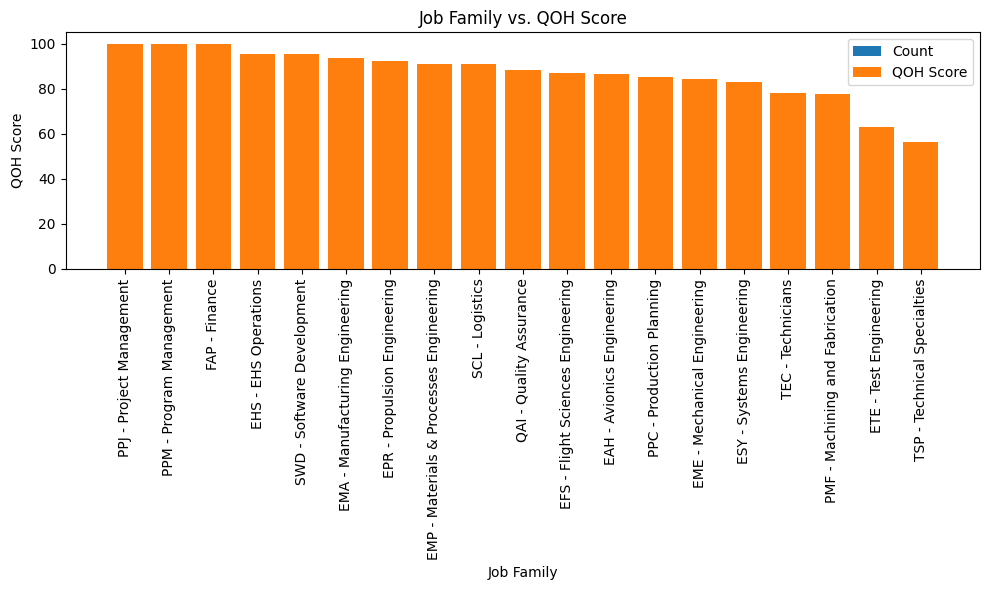

In [117]:

import matplotlib.pyplot as plt

# Define the data
job_family = [
    'PPJ - Project Management', 
    'PPM - Program Management', 
    'FAP - Finance', 
    'EHS - EHS Operations', 
    'SWD - Software Development', 
    'EMA - Manufacturing Engineering', 
    'EPR - Propulsion Engineering', 
    'EMP - Materials & Processes​ Engineering', 
    'SCL - Logistics', 
    'QAI - Quality Assurance', 
    'EFS - Flight Sciences Engineering', 
    'EAH - Avionics Engineering', 
    'PPC - Production Planning', 
    'EME - Mechanical Engineering', 
    'ESY - Systems Engineering',
    'TEC - Technicians',
    'PMF - Machining and Fabrication',
    'ETE - Test Engineering',
    'TSP - Technical Specialties'
]
count = [
    1, 2, 1, 1, 1, 5, 2, 1, 1, 5, 4, 1, 2, 2, 11, 11, 7, 5, 2
]
qoh_scores  = [
    100, 100, 100, 95.5, 95.5, 93.7, 92.125, 91, 91, 88.3, 87.0625, 86.5, 
    85.375, 84.25, 82.81818182, 77.90909091, 77.82142857, 63.1, 56.125
]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(job_family, count, label='Count')
plt.bar(job_family, qoh_scores, label='QOH Score')

# Add labels and title
plt.xlabel('Job Family')
plt.ylabel('QOH Score')
plt.title('Job Family vs. QOH Score')
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Show the chart
plt.tight_layout()
plt.show()

In [104]:
df.groupby(['last_hire_date'])['qoh_score'].mean().to_clipboard()
df.groupby(['last_hire_date', 'job_family'])['qoh_score'].mean().to_clipboard()


In [122]:
df_reliability = df.iloc[:, 23:33]
df_skills_factor_items = df.iloc[:, 23:25]
df_blue_lps_factor_items = df.iloc[:, 26:28]
df_level_fit_factor_items = df.iloc[:, 29:30]
df_overall_rate_factor_items = df.iloc[:, 31:33]

In [123]:

import pandas as pd
import numpy as np
import pingouin as pg
from datetime import datetime as dt
from datetime import timedelta
from datetime import date

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [138]:
df['skills_factor'] = (df['has_background_num'] +
                       df['has_skills_num'] + df['produced_quality_num'])
skills = df.skills_factor.describe()

df['blue_lps_factor'] = (df['works_well_oth_num'] +
                         df['is_motivated_num'] + df['demonstrates_lps_num'])
bluelps = df.blue_lps_factor.describe()

df['level_fit_factor'] = (df['correct_job_level_num'] +
                        df['will_succeed_num'])
levelfit = df.level_fit_factor.describe()

df['overall_rate_factor'] = (df['hire_again_num'] + df['raises_bar_num'] +
                            df['top_performer_num'])
overall = df.overall_rate_factor.describe()

df['total_qoh_score'] = (df['skills_factor'] + df['blue_lps_factor'] +
                         df['level_fit_factor'] + df['overall_rate_factor'])
qoh_total_score = df.total_qoh_score.describe()

score_ranges = pd.concat(
    [skills, bluelps, levelfit, overall, qoh_total_score], axis=1)
score_ranges.columns = ['Skills', 'Blue LPs',
                        'Level Fit', 'Rating', 'Overall QoH']

score_ranges.to_clipboard()

In [136]:
df.dtypes

start_date                            datetime64[ns]
end_date                              datetime64[ns]
status                                        object
ip_address                                    object
progress                                       int64
duration                                       int64
finished                                        bool
recorded_date                                 object
record_id                                     object
employee_id                                    int32
employee_last_name                            object
employee_first_name                           object
manager_email                                 object
location_latitude                            float64
location_longitude                           float64
distribution_channel                          object
user_language                                 object
rater_name_1                                  object
rater_name_2                                  

In [139]:
df['organization'] = df['cost_center_tier1']
df.loc[df['organization'] == "Environmental Health Safety",
       "organization"] = "Safety and Mission Assurance"
df.loc[(df['organization'].isin(['Security', 'Facilities',
        'Integrated Supply Chain', 'Quality'])), "organization"] = "Operations"
df['organization'].value_counts()

scores_by_org = pd.concat([
    df.groupby('organization').total_qoh_score.count(),
    df.groupby('organization').total_qoh_score.mean(),
    df.groupby('organization').total_qoh_score.std(),
], axis=1)

scores_by_org.to_clipboard()

In [140]:
###Adjust
df_reliability = df.iloc[:, 23:33]
df_skills_factor_items = df.iloc[:, 23:25]
df_blue_lps_factor_items = df.iloc[:, 26:28]
df_level_fit_factor_items = df.iloc[:, 29:30]
df_overall_rate_factor_items = df.iloc[:, 31:33]

In [146]:
df.dtypes

start_date                            datetime64[ns]
end_date                              datetime64[ns]
status                                        object
ip_address                                    object
progress                                       int64
duration                                       int64
finished                                        bool
recorded_date                                 object
record_id                                     object
employee_id                                    int32
employee_last_name                            object
employee_first_name                           object
manager_email                                 object
location_latitude                            float64
location_longitude                           float64
distribution_channel                          object
user_language                                 object
rater_name_1                                  object
rater_name_2                                  

In [ ]:
df['df_skills_factor_items'] = pd.to_numeric(df['df_skills_factor_items'])
df['df_blue_lps_factor_items'] = pd.to_numeric(df['df_blue_lps_factor_items'])
df['df_level_fit_factor_items'] = pd.to_numeric(df['df_level_fit_factor_items'])
df['df_overall_rate_factor_items'] = pd.to_numeric(df['df_overall_rate_factor_items'])
df['df_reliability'] = pd.to_numeric(df['df_reliability'])

In [141]:
print("The reliability of the overall scale = ",
      pg.cronbach_alpha(df_reliability))
print("skills factor = ", pg.cronbach_alpha(df_skills_factor_items))
print("blue lps factor = ", pg.cronbach_alpha(df_blue_lps_factor_items))
print("level fit factor = ", pg.cronbach_alpha(df_level_fit_factor_items))
print("overall rating factor = ", pg.cronbach_alpha(df_overall_rate_factor_items))

AssertionError: All columns must be numeric.

##Correlation

In [ ]:
df_hrbp_prep = df_hrbp[['employee_email', 'worker_id']]


In [ ]:
df_empid = pd.merge(df, df_hrbp_prep, how="left",
                     left_on="newhire_email", right_on="employee_email", sort=False)
